<h1>Module 16 Project Template</h1>

Use the code below to help you analyze the data returned by the MBTA API:

In [264]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    data = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(data, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(data, indent=4, sort_keys=True), outfile)
       
    print(json.dumps(data, indent=4, sort_keys=True))


{
    "data": [
        {
            "attributes": {
                "bearing": 107,
                "current_status": "IN_TRANSIT_TO",
                "current_stop_sequence": 4,
                "direction_id": 0,
                "label": "1861",
                "latitude": 42.33280819,
                "longitude": -71.08080356,
                "occupancy_status": "MANY_SEATS_AVAILABLE",
                "speed": null,
                "updated_at": "2023-01-29T22:24:01-05:00"
            },
            "id": "y1861",
            "links": {
                "self": "/vehicles/y1861"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "6",
                        "type": "stop"
                    }
                },
                "trip

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

pip install pymysql

In [265]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = '3306'
user = 'root'
password = 'MyNewPass'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses",
    conn)

df.tail(10)

/var/folders/_t/jsml5tws72xg9x1zq2pn3cdh0000gn/T/ipykernel_19628/2324256652.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM mbta_buses",


,record_num,route_number,id,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
9023,9024,1,y1866,20,IN_TRANSIT_TO,NaN,1,1866,42.339027,-71.063524,MANY_SEATS_AVAILABLE,None,2023-01-30 03:23:48
9024,9025,1,y1861,0,IN_TRANSIT_TO,3.0,0,1861,42.332775,-71.081086,MANY_SEATS_AVAILABLE,None,2023-01-30 03:23:43
9025,9026,1,y1782,0,IN_TRANSIT_TO,16.0,0,1782,42.360101,-71.094602,FEW_SEATS_AVAILABLE,None,2023-01-30 03:23:30
9026,9027,1,y1780,127,IN_TRANSIT_TO,6.0,1,1780,42.366865,-71.106076,MANY_SEATS_AVAILABLE,None,2023-01-30 03:23:44
9027,9028,1,y1778,0,IN_TRANSIT_TO,15.0,1,1778,42.341477,-71.083143,MANY_SEATS_AVAILABLE,None,2023-01-30 03:23:46
9028,9029,1,y1866,17,IN_TRANSIT_TO,NaN,1,1866,42.339822,-71.063194,MANY_SEATS_AVAILABLE,None,2023-01-30 03:23:53
9029,9030,1,y1861,72,IN_TRANSIT_TO,3.0,0,1861,42.332841,-71.080944,MANY_SEATS_AVAILABLE,None,2023-01-30 03:23:58
9030,9031,1,y1782,312,IN_TRANSIT_TO,16.0,0,1782,42.360291,-71.094989,FEW_SEATS_AVAILABLE,None,2023-01-30 03:23:56
9031,9032,1,y1780,119,IN_TRANSIT_TO,6.0,1,1780,42.366818,-71.105919,MANY_SEATS_AVAILABLE,None,2023-01-30 03:23:55
9032,9033,1,y1778,0,IN_TRANSIT_TO,15.0,1,1778,42.341480,-71.083112,MANY_SEATS_AVAILABLE,None,2023-01-30 03:23:55


In [266]:

df.to_csv('mbta.csv')

In [267]:
# Timeframe duration for recording MBTA bus operations
x = df['updated_at'].max() - df['updated_at'].min()
x

Timedelta('0 days 06:34:15')

<h1>What is the average time it takes for a bus to complete the route</h1>

In [268]:
#select a train data to expediate processing of below functions 
len(df)
df = df.tail(50)
df

,record_num,route_number,id,bearing,current_status,current_stop_sequence,direction_id,label,latitude,longitude,occupancy_status,speed,updated_at
8983,8984,1,y1778,144,IN_TRANSIT_TO,14.0,1,1778,42.343252,-71.085751,MANY_SEATS_AVAILABLE,None,2023-01-30 03:21:57
8984,8985,1,y1866,0,IN_TRANSIT_TO,NaN,1,1866,42.332390,-71.072435,MANY_SEATS_AVAILABLE,None,2023-01-30 03:21:43
8985,8986,1,y1782,342,IN_TRANSIT_TO,15.0,0,1782,42.358393,-71.093101,FEW_SEATS_AVAILABLE,None,2023-01-30 03:22:12
8986,8987,1,y1780,119,IN_TRANSIT_TO,2.0,1,1780,42.371004,-71.115635,MANY_SEATS_AVAILABLE,None,2023-01-30 03:22:13
8987,8988,1,y1778,150,IN_TRANSIT_TO,14.0,1,1778,42.342498,-71.084729,MANY_SEATS_AVAILABLE,None,2023-01-30 03:22:13
8988,8989,1,y1866,45,IN_TRANSIT_TO,NaN,1,1866,42.332380,-71.072440,MANY_SEATS_AVAILABLE,None,2023-01-30 03:22:19
8989,8990,1,y1782,334,IN_TRANSIT_TO,15.0,0,1782,42.358677,-71.093190,FEW_SEATS_AVAILABLE,None,2023-01-30 03:22:22
8990,8991,1,y1780,115,IN_TRANSIT_TO,2.0,1,1780,42.370539,-71.114480,MANY_SEATS_AVAILABLE,None,2023-01-30 03:22:22
8991,8992,1,y1778,0,IN_TRANSIT_TO,14.0,1,1778,42.342438,-71.084699,MANY_SEATS_AVAILABLE,None,2023-01-30 03:22:22
8992,8993,1,y1866,34,IN_TRANSIT_TO,NaN,1,1866,42.332467,-71.072452,MANY_SEATS_AVAILABLE,None,2023-01-30 03:22:31


In [269]:
#pip install haversine
import pandas as pd
import numpy as np
import sklearn.neighbors
import math
from haversine import haversine, Unit
from math import radians, sin, cos, sqrt, asin
# Knowing that a drive time equals distance/average drive speed. 
#calculting the distance first 
def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8  # Earth radius in kilometers
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat / 2)**2 + cos(lat1) * cos(lat2) * sin(dLon / 2)**2
    c = 2 * asin(sqrt(a))
    return R * c      
dist_array = []
for i , r in df.iterrows():
    point1 = {"latitude": r["latitude"], "longitude": r["longitude"]}
    for j, o in df[df.index != i].iterrows():
        point2 = {"latitude": o["latitude"], "longitude": o["longitude"]}
        dist = haversine(r["latitude"], r["longitude"], o["latitude"],o["longitude"])
        dist_array.append((dist))
#To get the averge distance 
def average(lst):
    return sum(lst) / len(lst)
averageDist = round(average(dist_array),2)
#To get the averge speed , we add all the speed values found in the data and divide it by the length of speed column
#speedValues=df['speed'].tolist() 
#averageSpeed = round(average(speedValues))
averageSpeed= df["speed"].mean()
"""since all the records gathered had shown a null speed value, we could assume the average speed value of a bus is 50 km / hour """
#To calculate the average time a bus needs to complete the route (knowing that a drive time equals distance/average drive speed). 
averageSpeed = 50
averageTime = averageDist/averageSpeed
#to print the results (take note that speed is km per hour and distance is in kilmeters ; therefore , time is measured in hours). 
print('Average distance in kilometers is: ', averageDist)
print('Average time in hours: ', round(averageTime,2))
print('Average time in minutes: ', round(averageTime*60,2))
print('Average time in seconds: ', round(averageTime*3600))

Average distance in kilometers is:  2.31
Average time in hours:  0.05
Average time in minutes:  2.77
Average time in seconds:  166


<h1>Provide a Visualization based on the data</h1>

Text(0.5, 0, 'Distance values')

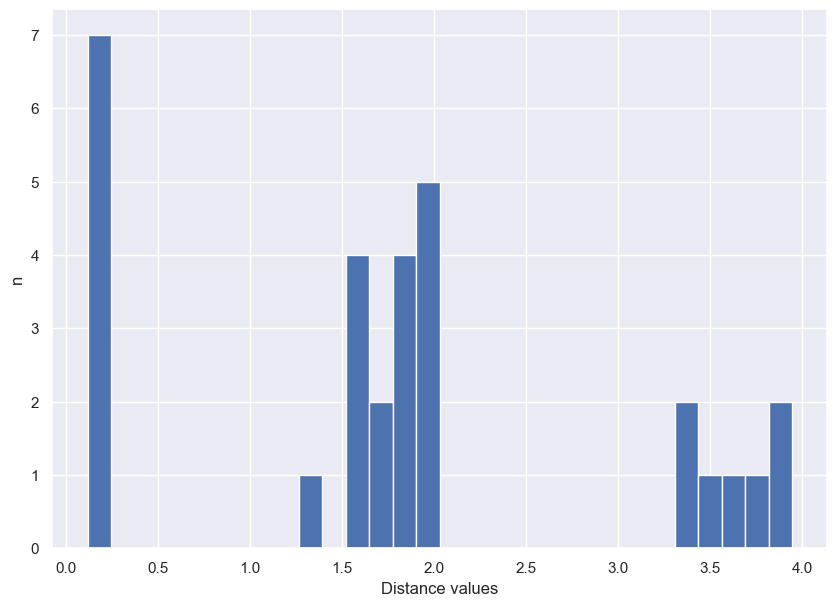

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
#adding distance and time values in the dataframe 
dis = dist_array[0:30]
plt.hist(dis,bins=30)
plt.ylabel('n')
plt.xlabel('Distance values')

<h1>Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence. </h1> 

Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

In [271]:
# Number of records per bus
df['label'].value_counts()

1778    12
1866    11
1782    11
1780    11
1861     5
Name: label, dtype: int64

In [272]:
# Grouping records by bus and lap sequence(represented by the 'group_diff' column)
agg_df = df.groupby(['id', 'current_stop_sequence', 'direction_id'])\
            .agg({'latitude': ['mean'],'longitude': ['mean'], 'updated_at':['min']})
agg_df

latitude  longitude  \
                                               mean       mean   
id    current_stop_sequence direction_id                         
y1778 14.0                  1             42.342483 -71.084684   
      15.0                  1             42.341491 -71.083151   
y1780 2.0                   1             42.370771 -71.115057   
      3.0                   1             42.370071 -71.113265   
      4.0                   1             42.369307 -71.111035   
      5.0                   1             42.368212 -71.108270   
      6.0                   1             42.366950 -71.106181   
y1782 15.0                  0             42.359231 -71.093669   
      16.0                  0             42.360163 -71.094705   
y1861 2.0                   0             42.331434 -71.082304   
      3.0                   0             42.332691 -71.081113   

                                                  updated_at  
                                                         min  
id    current_stop_sequence direction_id                      
y1778 14.0                  1            2023-01-30 03:21:57  
      15.0                  1            2023-01-30 03:23:36  
y1780 2.0                   1            2023-01-30 03:22:13  
      3.0                   1            2023-01-30 03:22:31  
      4.0                   1            2023-01-30 03:22:43  
      5.0                   1            2023-01-30 03:23:04  
      6.0                   1            2023-01-30 03:23:35  
y1782 15.0                  0            2023-01-30 03:22:12  
      16.0                  0            2023-01-30 03:23:22  
y1861 2.0                   0            2023-01-30 03:23:14  
      3.0                   0            2023-01-30 03:23:33

In [273]:
agg_df.reset_index(inplace=True)
agg_df

,id,current_stop_sequence,direction_id,latitude,longitude,updated_at
,,,,mean,mean,min
0,y1778,14.0,1,42.342483,-71.084684,2023-01-30 03:21:57
1,y1778,15.0,1,42.341491,-71.083151,2023-01-30 03:23:36
2,y1780,2.0,1,42.370771,-71.115057,2023-01-30 03:22:13
3,y1780,3.0,1,42.370071,-71.113265,2023-01-30 03:22:31
4,y1780,4.0,1,42.369307,-71.111035,2023-01-30 03:22:43
5,y1780,5.0,1,42.368212,-71.108270,2023-01-30 03:23:04
6,y1780,6.0,1,42.366950,-71.106181,2023-01-30 03:23:35
7,y1782,15.0,0,42.359231,-71.093669,2023-01-30 03:22:12
8,y1782,16.0,0,42.360163,-71.094705,2023-01-30 03:23:22


In [274]:
# Flattening the dataframe so that there is only one index
agg_df.columns = agg_df.columns.get_level_values(0)
agg_df

,id,current_stop_sequence,direction_id,latitude,longitude,updated_at
0,y1778,14.0,1,42.342483,-71.084684,2023-01-30 03:21:57
1,y1778,15.0,1,42.341491,-71.083151,2023-01-30 03:23:36
2,y1780,2.0,1,42.370771,-71.115057,2023-01-30 03:22:13
3,y1780,3.0,1,42.370071,-71.113265,2023-01-30 03:22:31
4,y1780,4.0,1,42.369307,-71.111035,2023-01-30 03:22:43
5,y1780,5.0,1,42.368212,-71.108270,2023-01-30 03:23:04
6,y1780,6.0,1,42.366950,-71.106181,2023-01-30 03:23:35
7,y1782,15.0,0,42.359231,-71.093669,2023-01-30 03:22:12
8,y1782,16.0,0,42.360163,-71.094705,2023-01-30 03:23:22
9,y1861,2.0,0,42.331434,-71.082304,2023-01-30 03:23:14


In [275]:
agg_df['current_stop_sequence'].value_counts()

15.0    2
2.0     2
3.0     2
14.0    1
4.0     1
5.0     1
6.0     1
16.0    1
Name: current_stop_sequence, dtype: int64

In [276]:
# Selecting the first full lap to compare all busses against eachother
gp_df = agg_df[agg_df['current_stop_sequence']==1]
gp_df

,id,current_stop_sequence,direction_id,latitude,longitude,updated_at


In [277]:
# Archiving the summarized dataframe
gp_df.to_csv('agg_df.csv', index=False)

In [278]:
# First creating a dataframe that contains the finish times for the first full lap
max_df = gp_df.groupby(['id']).agg({'updated_at': ['max']})
max_df.reset_index(inplace=True)
max_df.columns = max_df.columns.get_level_values(0)
max_df = max_df.rename(columns = {'updated_at': 'max_time'})

# Building another dataframe that contains the start times for the first full lap
min_df = gp_df.groupby(['id']).agg({'updated_at': ['min']})
min_df.reset_index(inplace=True)
min_df.columns = min_df.columns.get_level_values(0)
min_df = min_df.rename(columns = {'updated_at': 'min_time'})

# Joining the two dataframes and taking the difference between the start and finish times
duration_df = pd.merge(max_df, min_df, how='inner')
duration_df['duration'] = duration_df['max_time'] - duration_df['min_time']
duration_df

,max_time,id,min_time,duration


In [279]:
duration_df['duration'].mean()

NaT

In [280]:
# Excluding busses 1812 and 1863 which were not fully operational
trimmed_df = duration_df[~duration_df['id'].isin(['y1778','y1861'])]
trimmed_df['duration'].mean()

NaT

In [281]:
import numpy as np
import datetime as dt

duration_df['minutes'] = duration_df['duration'].dt.total_seconds()/60
duration_df

,max_time,id,min_time,duration,minutes


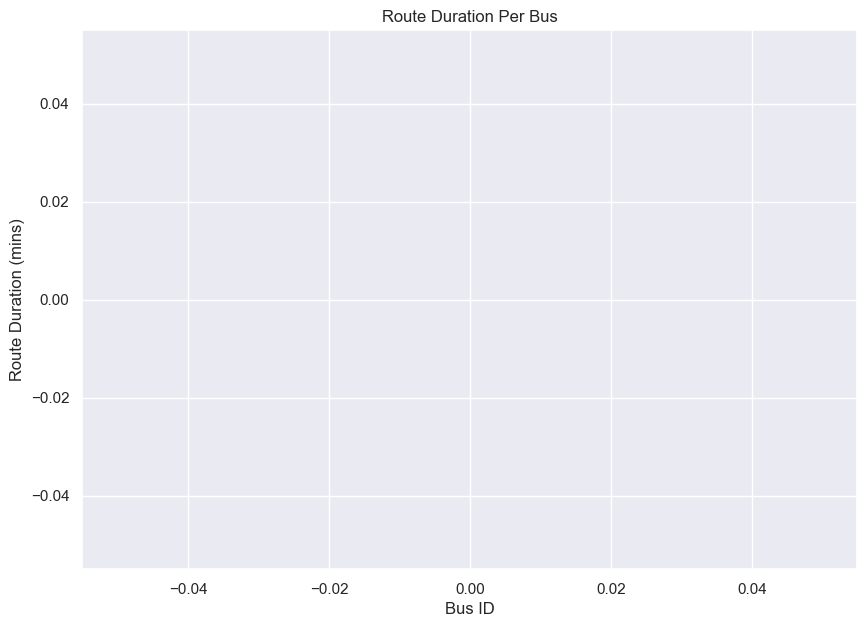

In [282]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

plt.bar(duration_df['id'], duration_df['minutes'], width = 0.5)
plt.xlabel("Bus ID")
plt.ylabel("Route Duration (mins)")
plt.title("Route Duration Per Bus")
plt.rcParams["figure.figsize"] = (10,7)
plt.show()